In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
import sys
import os
import fredapi as f
import calendar

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [286]:
def ensure_path(user_path):
    """
        ENSURES THAT USER_PATH is included in the path
    """
    sys.path.insert(0,user_path) if user_path not in sys.path else _;
    
def plotMonthReturn(df,year, month, title = 'SP 500 Daily Return'):
    """
        INPUT:
            df -- dataframe with pl column 
            year -- interger :year for which pl needs to be plotted
            month -- integer :month for which pl needs to be plotted
        OUTPUT:
            barplot
    """
    fig , ax = plt.subplots()
    dt = df.loc[str(year)+'-'+str(month)]
    colors = list(map(lambda x: 'red' if x < 0 else 'blue',dt['pl'].values))
    dt['pl'].plot.bar(figsize = [12,5],color = colors, ax = ax, alpha = 0.3)
    ax.set_xticklabels(labels = [str(j) for j in dt.index.day]\
                   ,fontweight='bold')
    plt.ylabel('% Daily Return')
    s = '\n Date in {} {}'.format(calendar.month_abbr[month],str(year))
    plt.xlabel(s, fontsize = 14)
    ax.grid(True,alpha = 0.3)
    plt.title(title, fontsize = 14)
    sns.despine()
    return fig , ax

def plothist(df,bins = np.arange(-7,7,0.2), title = 'SP 500 Daily Return'):
    """
        plots the histogram if a data frame with a 'pl' column is passed 
        INPUT:
            df : Dataframe with a column named 'pl'
            bins: optional bins
        OUTPUT:
         histogram
    """
    ax = df.pl.hist(figsize = [12,5],alpha = 0.4,bins = bins, edgecolor = 'white')
    ax.set_title(title, fontsize = 14)
    ax.grid(False)
    sns.despine()
    return ax


In [51]:
ensure_path(user_path = os.path.join('..','..',''))

In [139]:
from secret import akey
fred = f.Fred(api_key=akey)

In [140]:
spx = df = pd.DataFrame(fred.get_series('SP500'),columns=['sp500'])

In [141]:
spx['logPrice'] = np.log(spx.sp500)
spx['pl'] = np.round(100 * spx.logPrice.diff(periods=1),2)
spx = spx.dropna()

In [267]:
spx['2018'].describe()

,sp500,logPrice,pl
count,241.000000,241.000000,241.000000
mean,2748.589004,7.918182,-0.031369
std,99.349108,0.036571,1.036335
min,2351.100000,7.762639,-4.180000
25%,2691.250000,7.897761,-0.430000
50%,2746.870000,7.918217,0.060000
75%,2816.290000,7.943176,0.540000
max,2930.750000,7.983014,2.680000


In [178]:
spx['2018-12']

,sp500,logPrice,pl
2018-12-03,2790.37,7.933929,1.09
2018-12-04,2700.06,7.901029,-3.29
2018-12-07,2633.08,7.875910,-2.36
2018-12-10,2637.72,7.877670,0.18
2018-12-11,2636.78,7.877314,-0.04
2018-12-12,2651.07,7.882719,0.54
2018-12-13,2650.54,7.882519,-0.02
2018-12-14,2599.95,7.863247,-1.93
2018-12-17,2545.94,7.842255,-2.10
2018-12-18,2546.16,7.842342,0.01


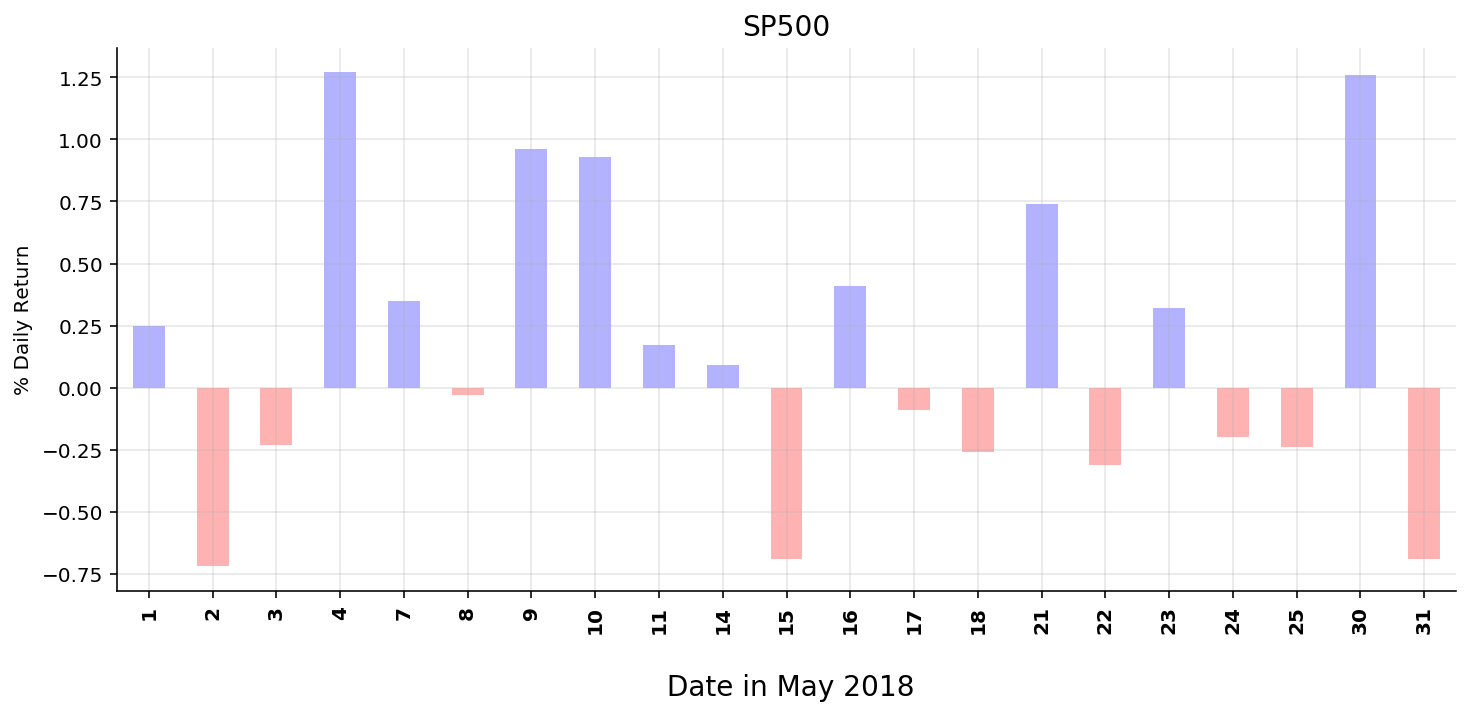

In [263]:
plotMonthReturn(spx, 2018,5, title = 'SP500');

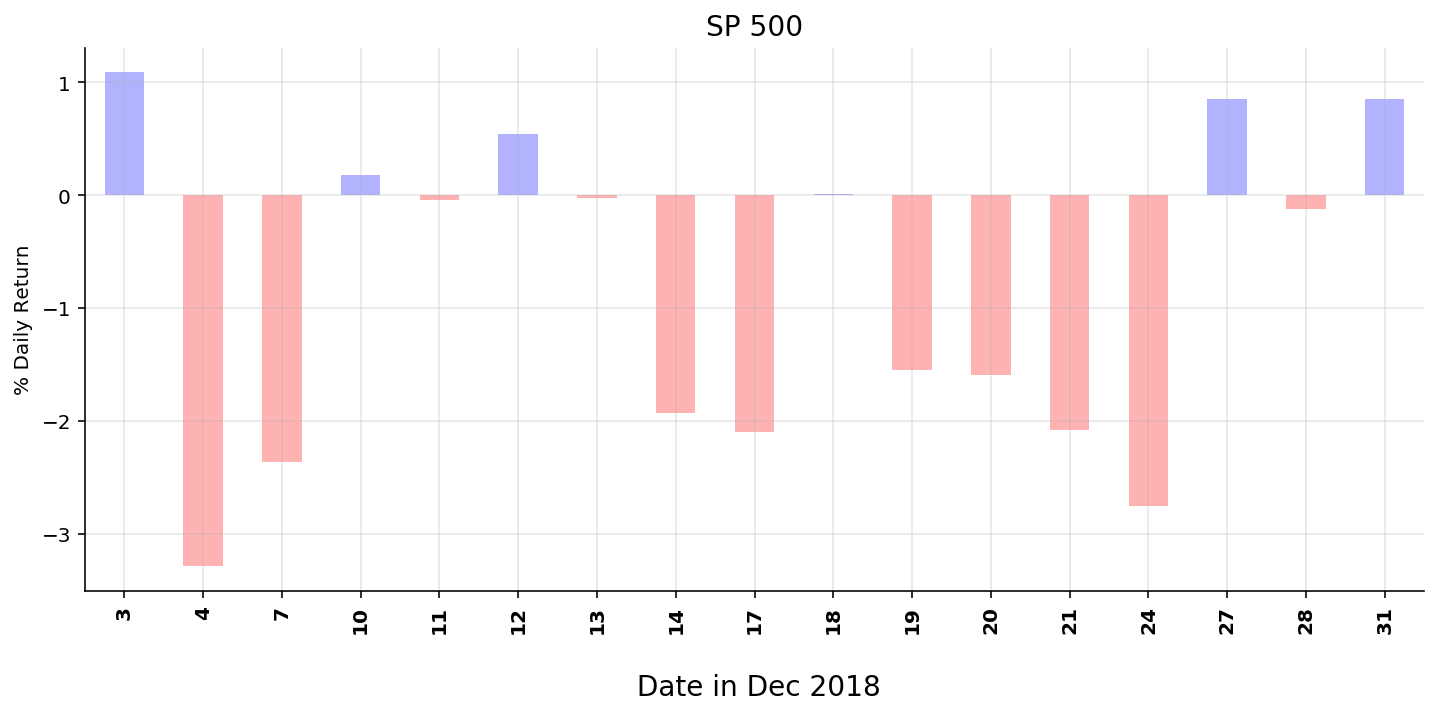

In [265]:
plotMonthReturn(spx, 2018,12, title = 'SP 500');

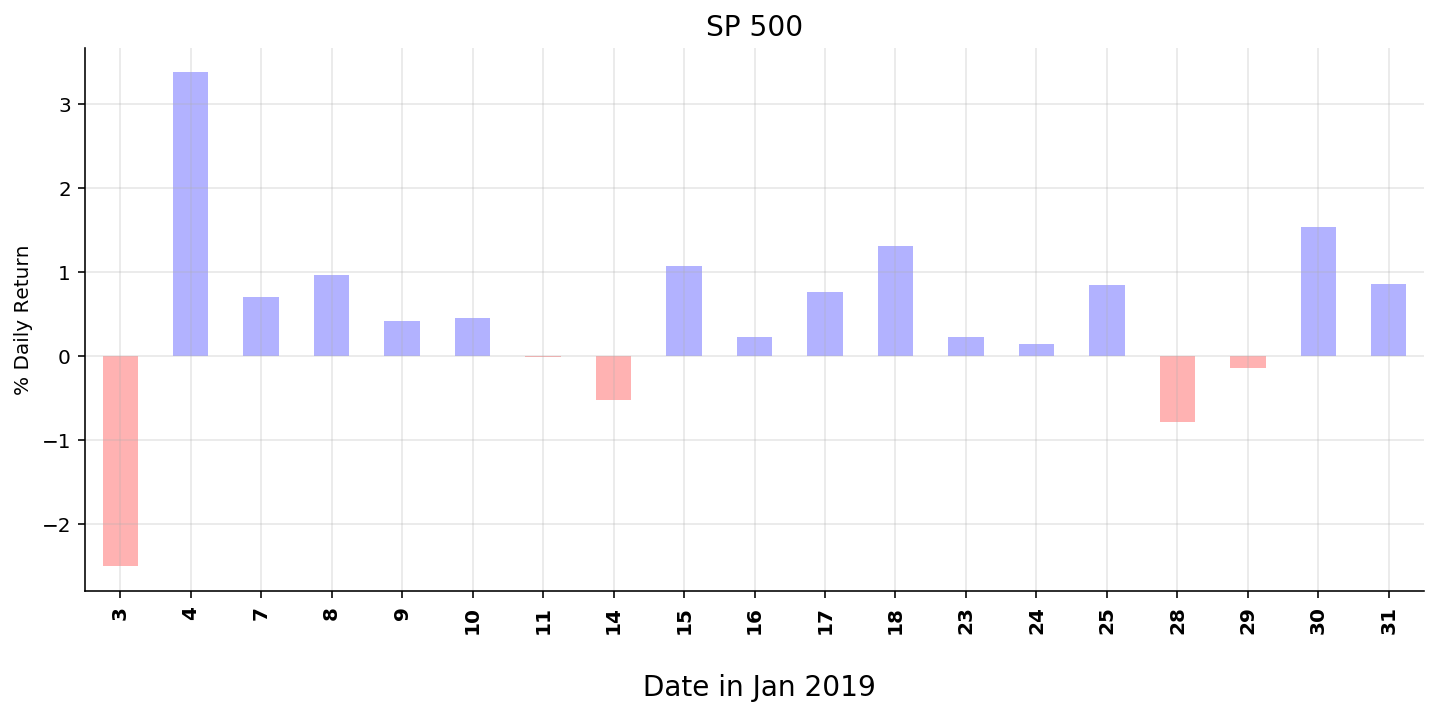

In [266]:
plotMonthReturn(spx, 2019,1, title = 'SP 500');

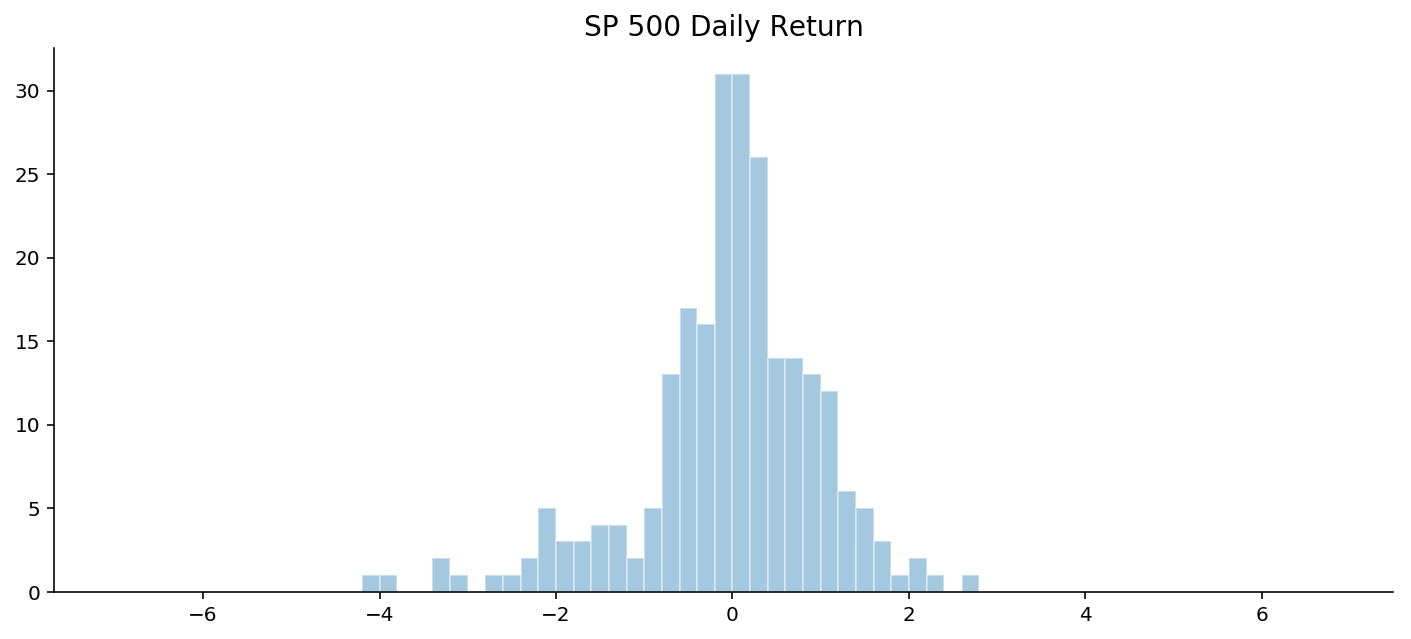

In [291]:
plothist(spx['2018']);

In [299]:
spx_sd = spx.pl.rolling(30).std().dropna() * 16

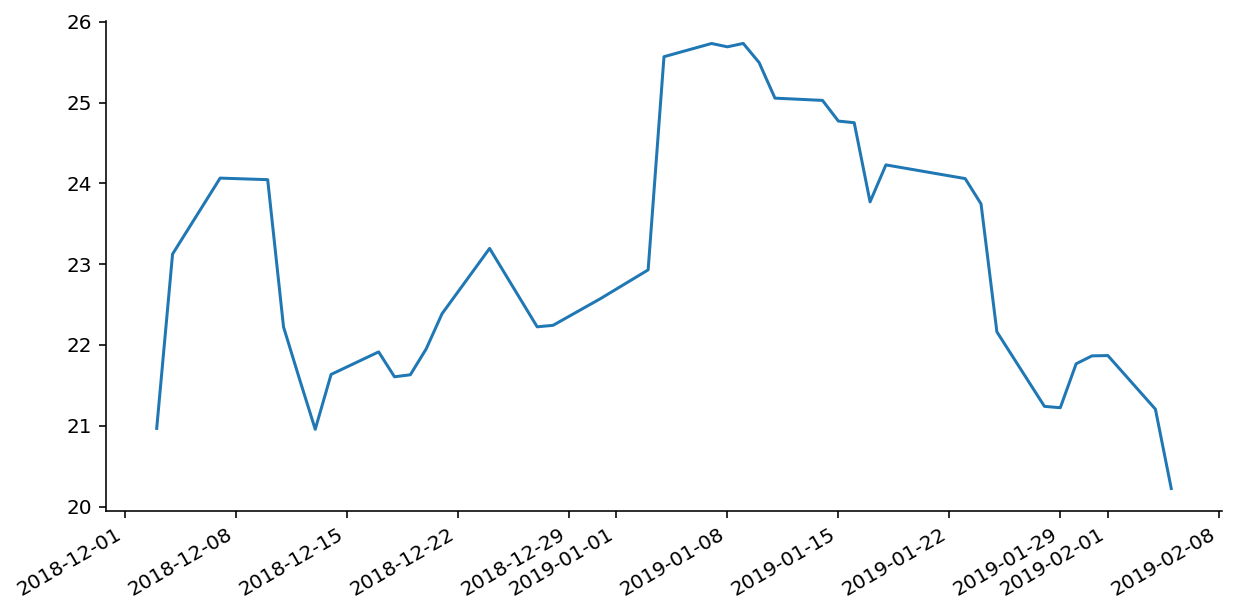

In [314]:
spx_sd['2018-12':].plot(grid = False, figsize = [10,5])
sns.despine()

In [359]:
spx_m = spx['sp500'].resample('M').apply(lambda x : 100* (x[-1]/x[0] - 1))
spx_m_stats = spx_m.describe()
spx_m_stats

count    121.000000
mean       0.882720
std        4.178019
min      -15.496212
25%       -1.123547
50%        1.186979
75%        3.035319
max       14.016175
Name: sp500, dtype: float64

In [361]:
spx_m_stats['mean'] + 2 * spx_m_stats['std']

9.238758956587258

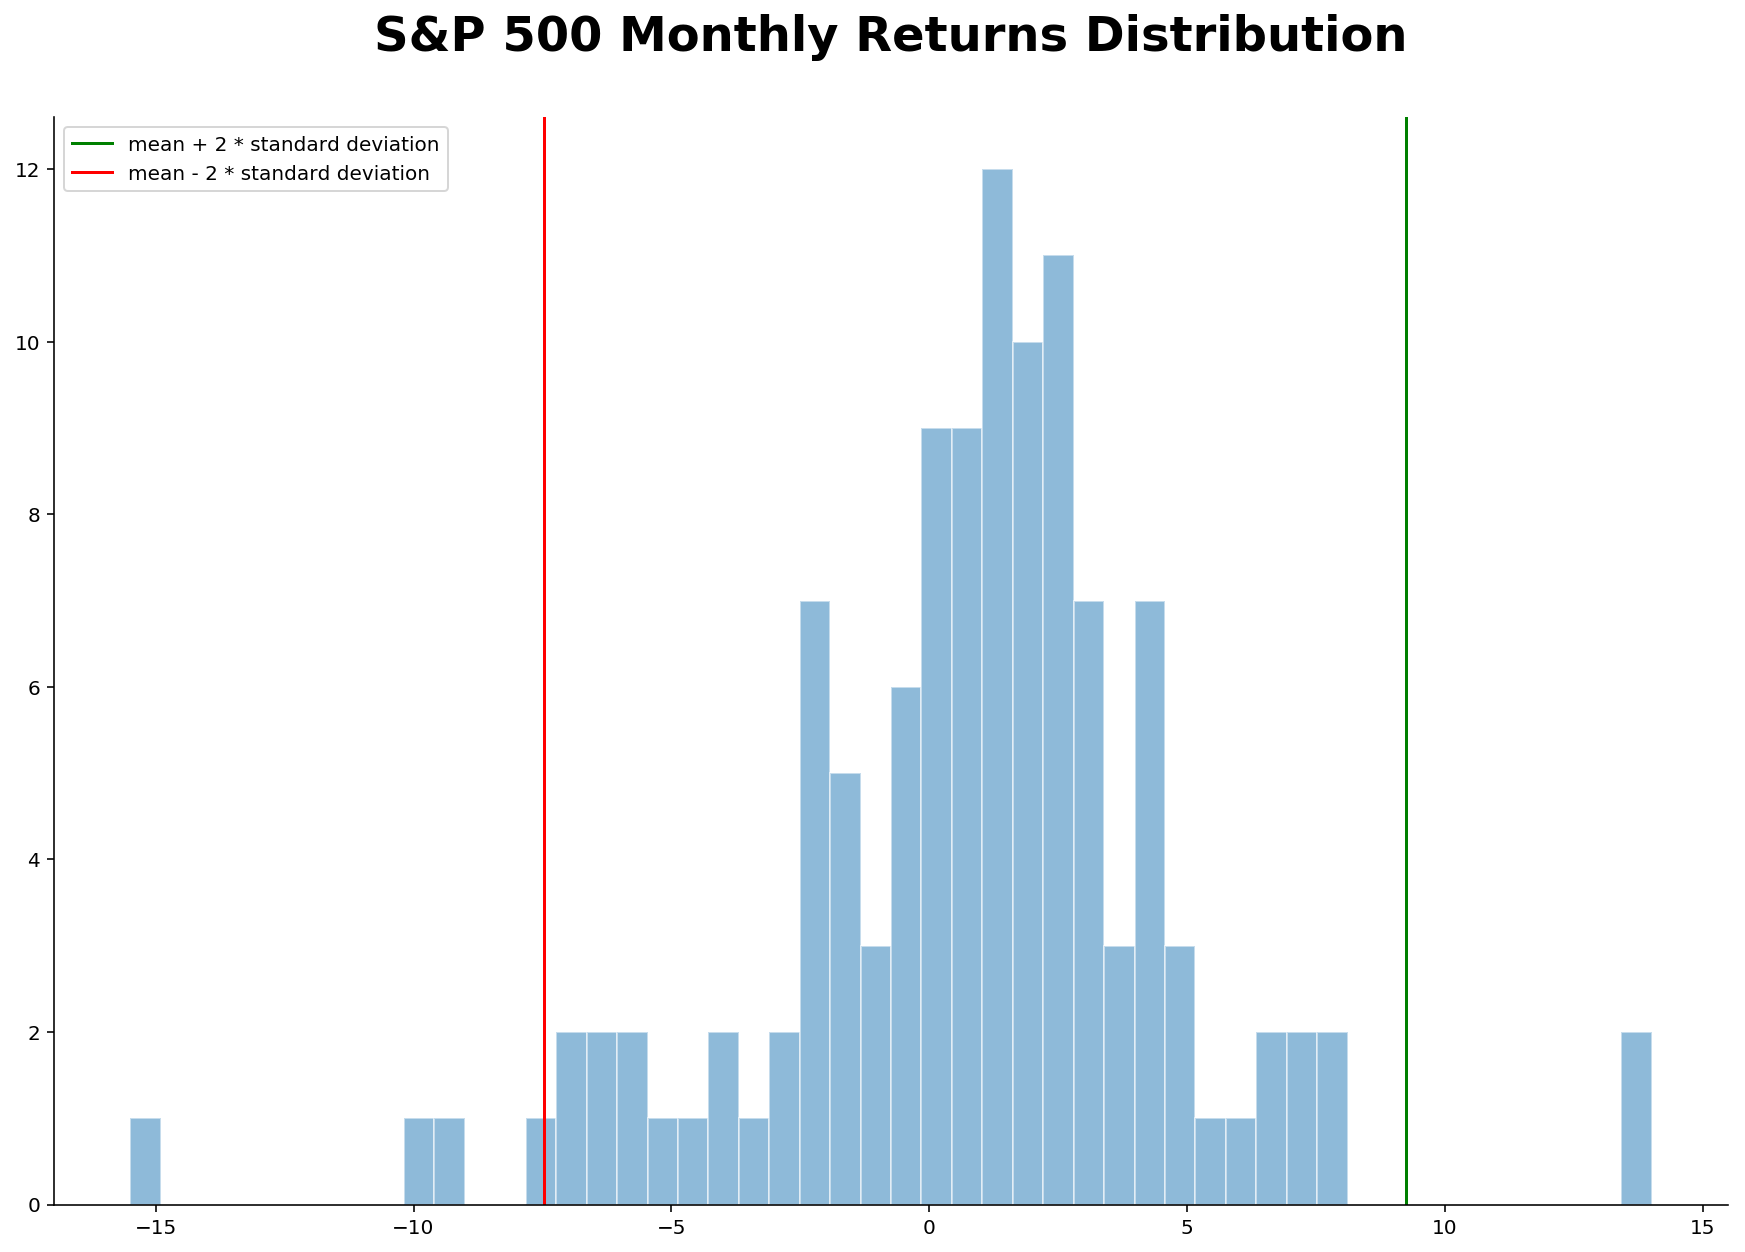

In [411]:
spx_m[:'2018'].hist(figsize = [15,10], bins = 50,\
                    grid = False, alpha = 0.5, edgecolor = 'white')
plt.axvline(x = spx_m_stats['mean'] + 2 * spx_m_stats['std'], color = 'green',\
            label = 'mean + 2 * standard deviation')
plt.axvline(x= spx_m_stats['mean'] - 2 * spx_m_stats['std'], color = 'red',\
           label = 'mean - 2 * standard deviation') 
plt.legend(loc = 'upper left')
plt.title('S&P 500 Monthly Returns Distribution\n', fontsize = 24, fontweight='bold')
sns.despine()
plt.savefig('SP500_Histogram.png')

In [382]:
spx_m['2018']

2018-01-31     4.082107
2018-02-28    -3.832416
2018-03-31    -1.374329
2018-04-30     1.285165
2018-05-31     1.901085
2018-06-30    -0.594232
2018-07-31     3.285278
2018-08-31     3.133620
2018-09-30     0.878626
2018-10-31    -7.277943
2018-11-30     0.722530
2018-12-31   -10.160660
Freq: M, Name: sp500, dtype: float64

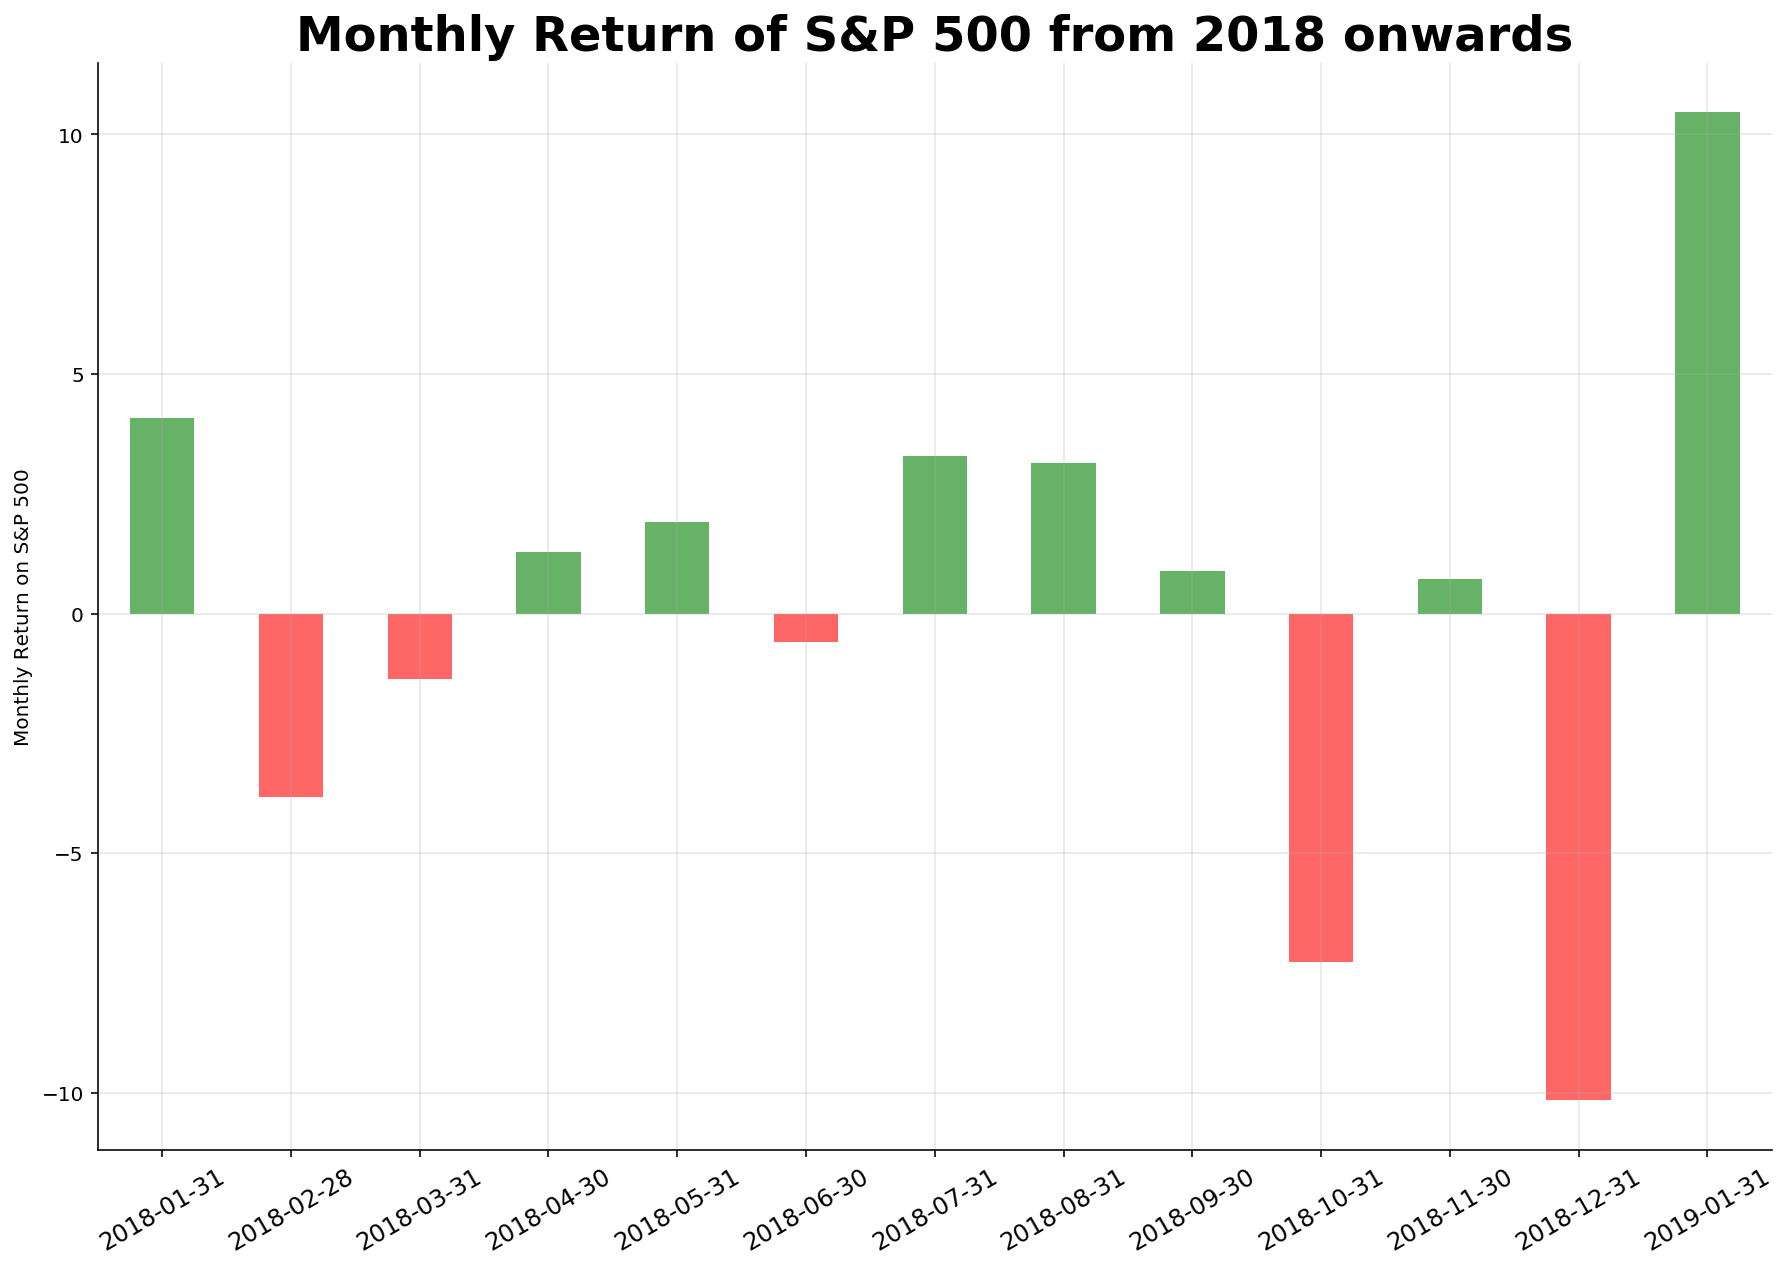

In [408]:
df = spx_m['2018':'2019-01']
colors = list(map(lambda x: 'green' if x > 0 else 'red', df.values))
ax = df.plot.bar(figsize = [15,10], color = colors, alpha = 0.6)
ax.set_xticklabels(labels = [ex.strftime('%Y-%m-%d') for ex in df.index], fontsize = 12)
plt.xticks(rotation = 30)
plt.ylabel('Monthly Return on S&P 500')
ax.grid(True, alpha = 0.3)
plt.title('Monthly Return of S&P 500 from 2018 onwards', fontweight='bold', fontsize = 24)
sns.despine()
plt.savefig('SP500_2018_2019.png')

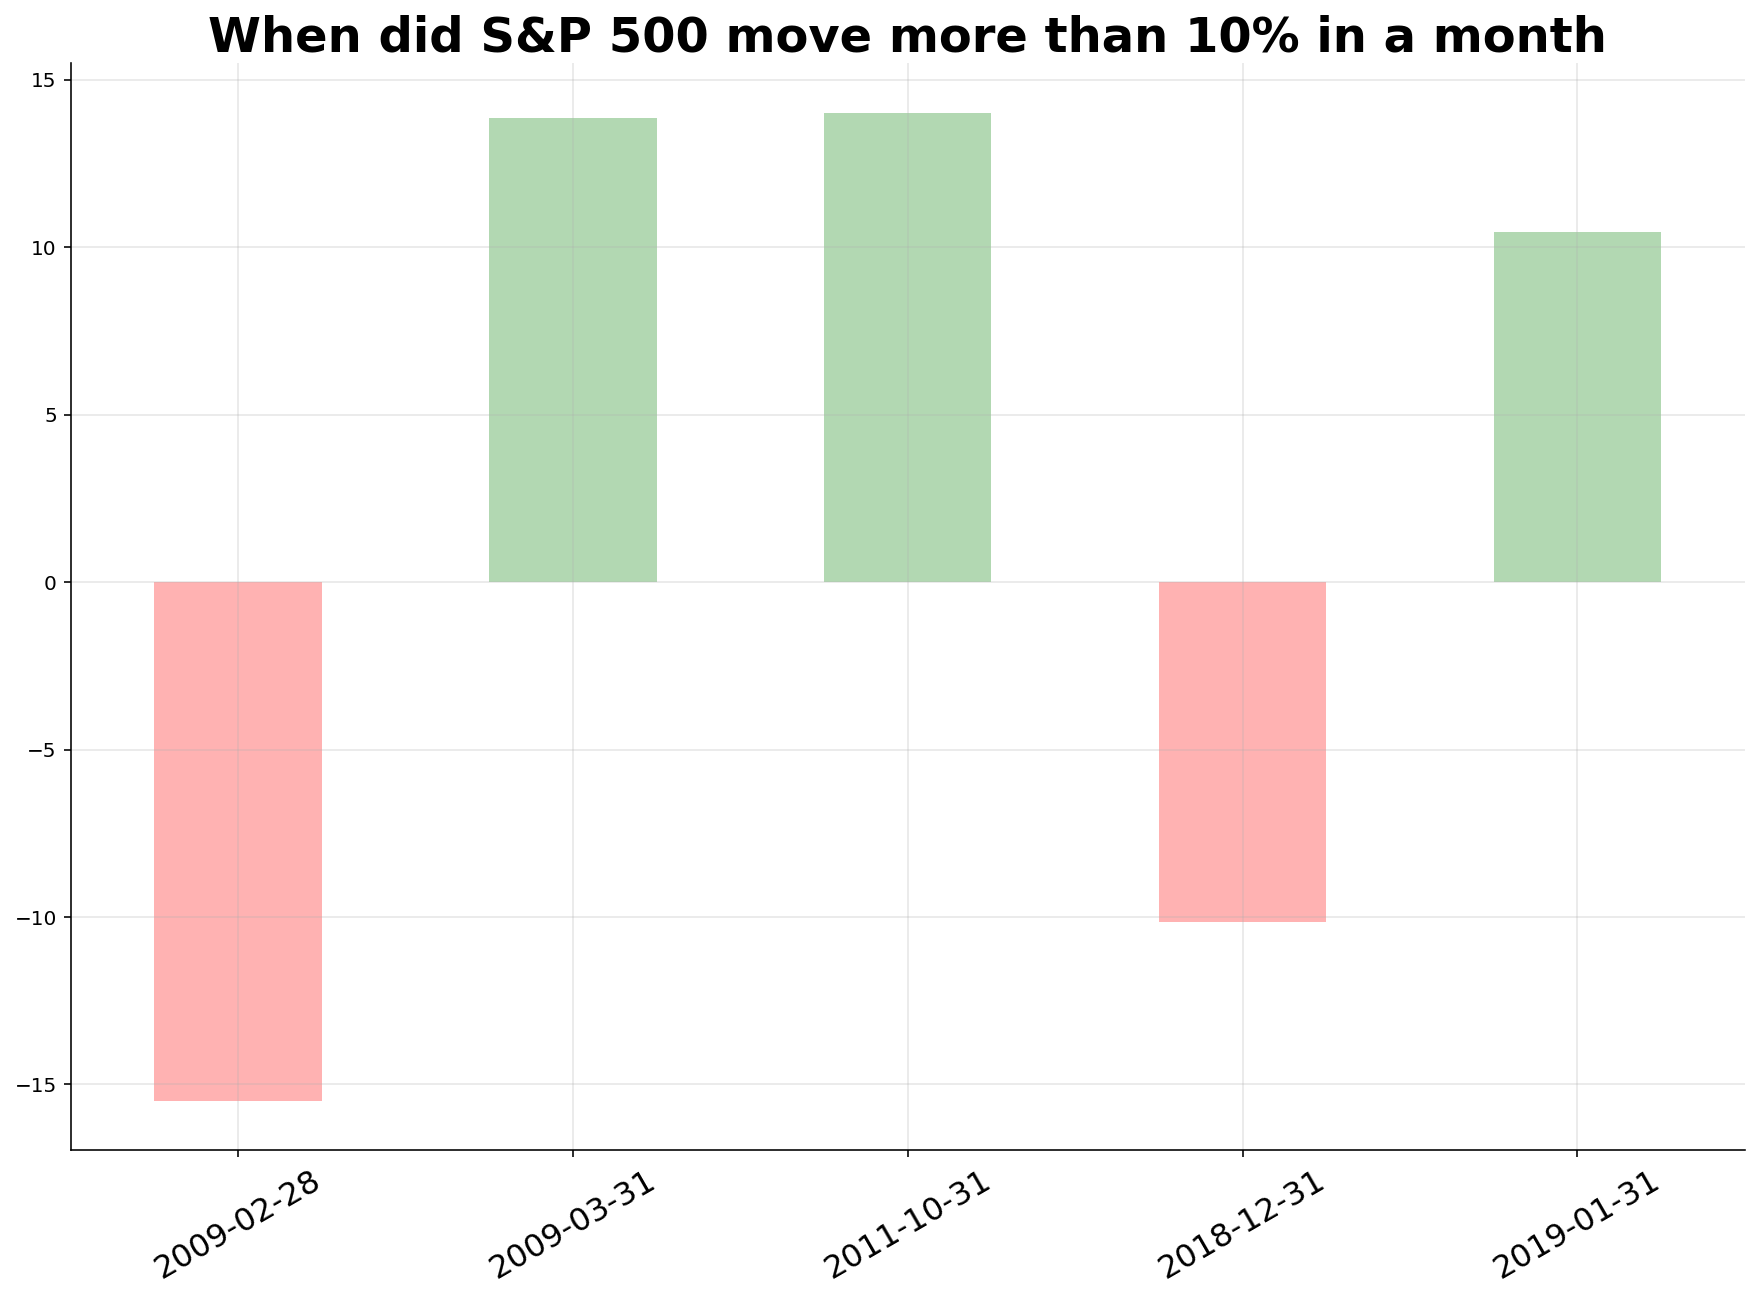

In [415]:
df = spx_m[np.abs(spx_m ) > 10]
colors = list(map(lambda x: 'green' if x > 0 else 'red', df.values))
ax = df.plot.bar(figsize = [15,10], color = colors, alpha = 0.3)
ax.set_xticklabels(labels = [ex.strftime('%Y-%m-%d') for ex in df.index], fontsize = 16)
plt.xticks(rotation = 30)
ax.grid(True, alpha = 0.3)
plt.title('When did S&P 500 move more than 10% in a month', fontweight='bold', fontsize = 24)
sns.despine()
plt.savefig('SP500_BigMoves.png')

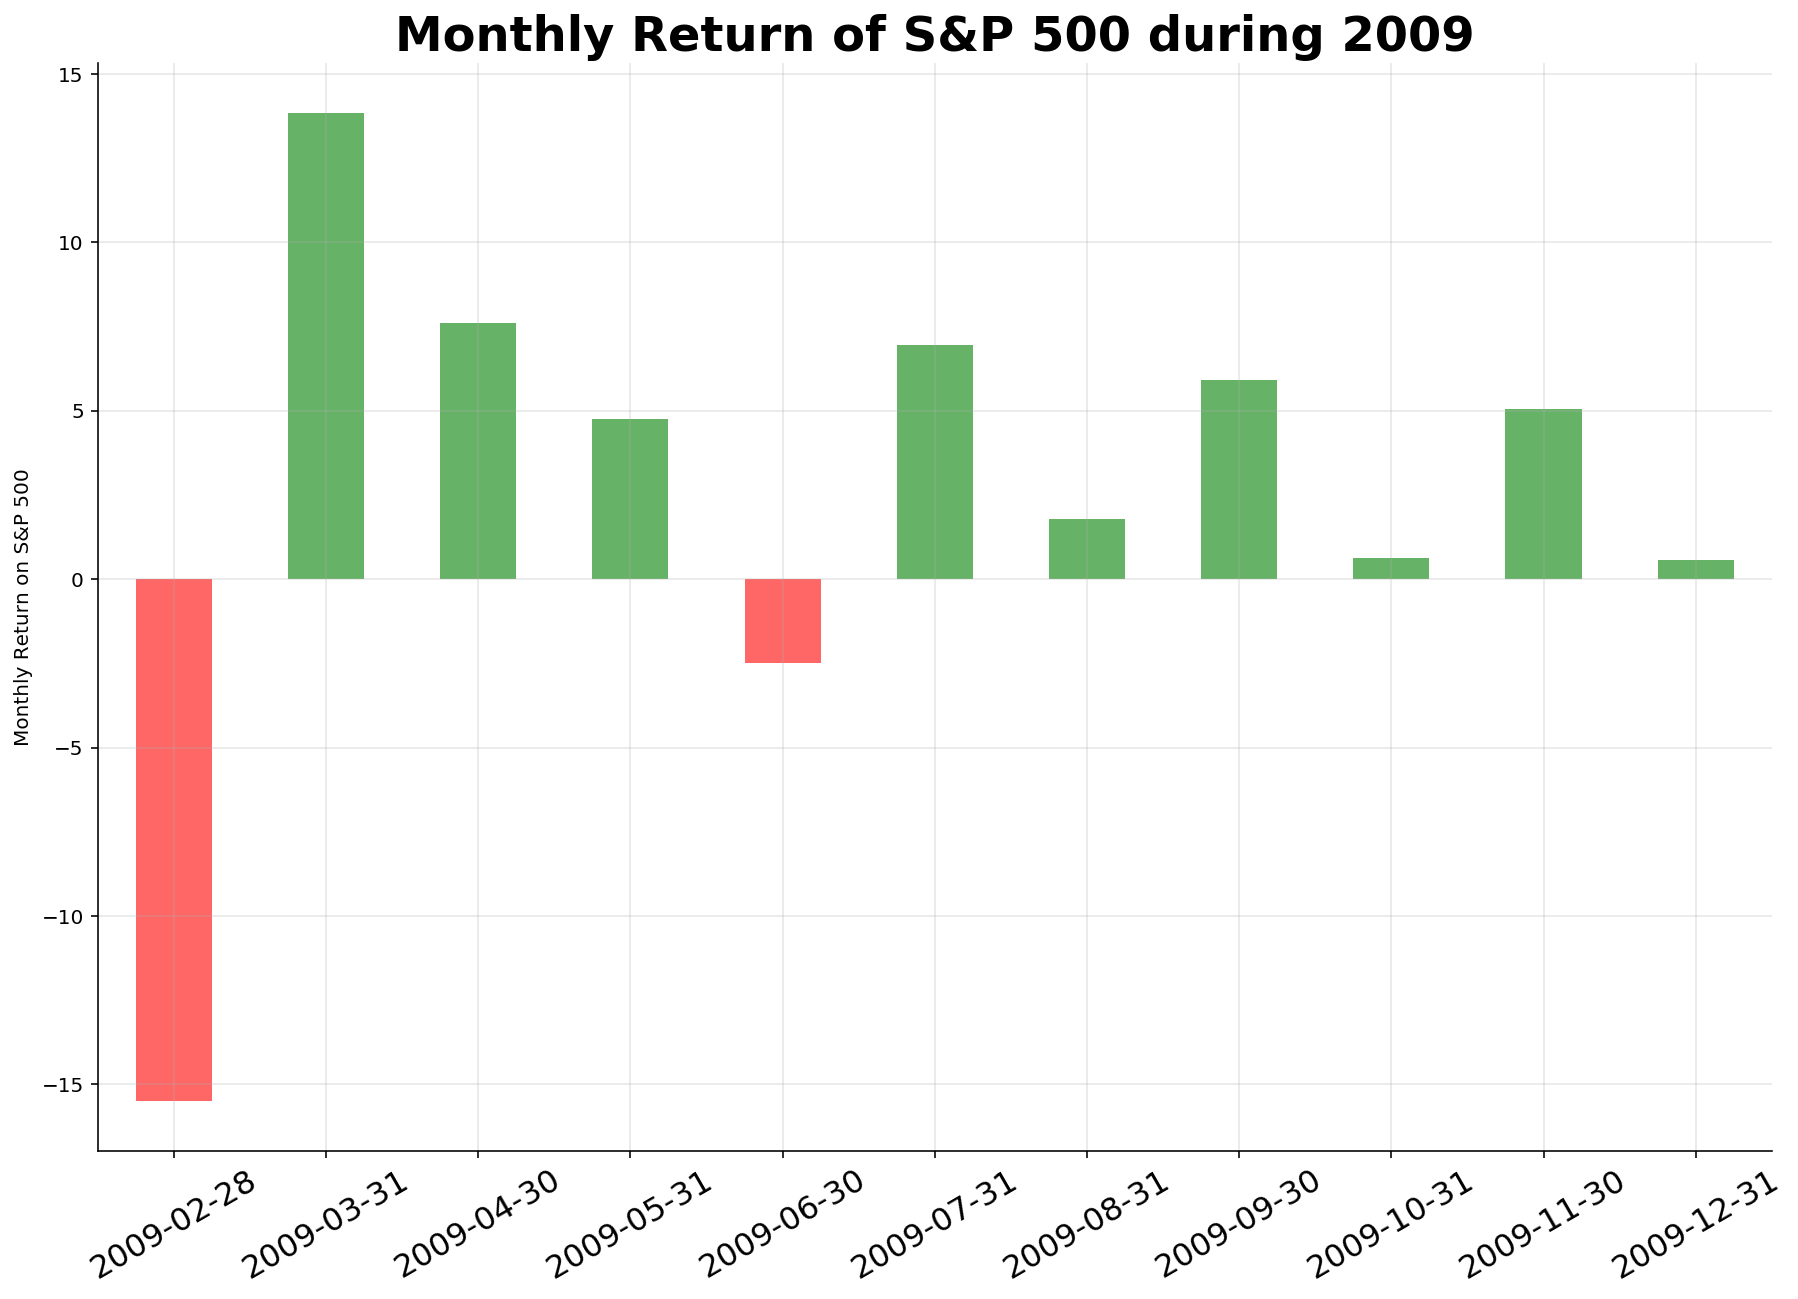

In [418]:
df = spx_m['2009']
colors = list(map(lambda x: 'green' if x > 0 else 'red', df.values))
ax = df.plot.bar(figsize = [15,10], color = colors, alpha = 0.6)
ax.set_xticklabels(labels = [ex.strftime('%Y-%m-%d') for ex in df.index], fontsize = 16)
plt.xticks(rotation = 30)
plt.ylabel('Monthly Return on S&P 500')
ax.grid(True, alpha = 0.3)
plt.title('Monthly Return of S&P 500 during 2009', fontweight='bold', fontsize = 24)
sns.despine()
plt.savefig('SP500_2009.png')

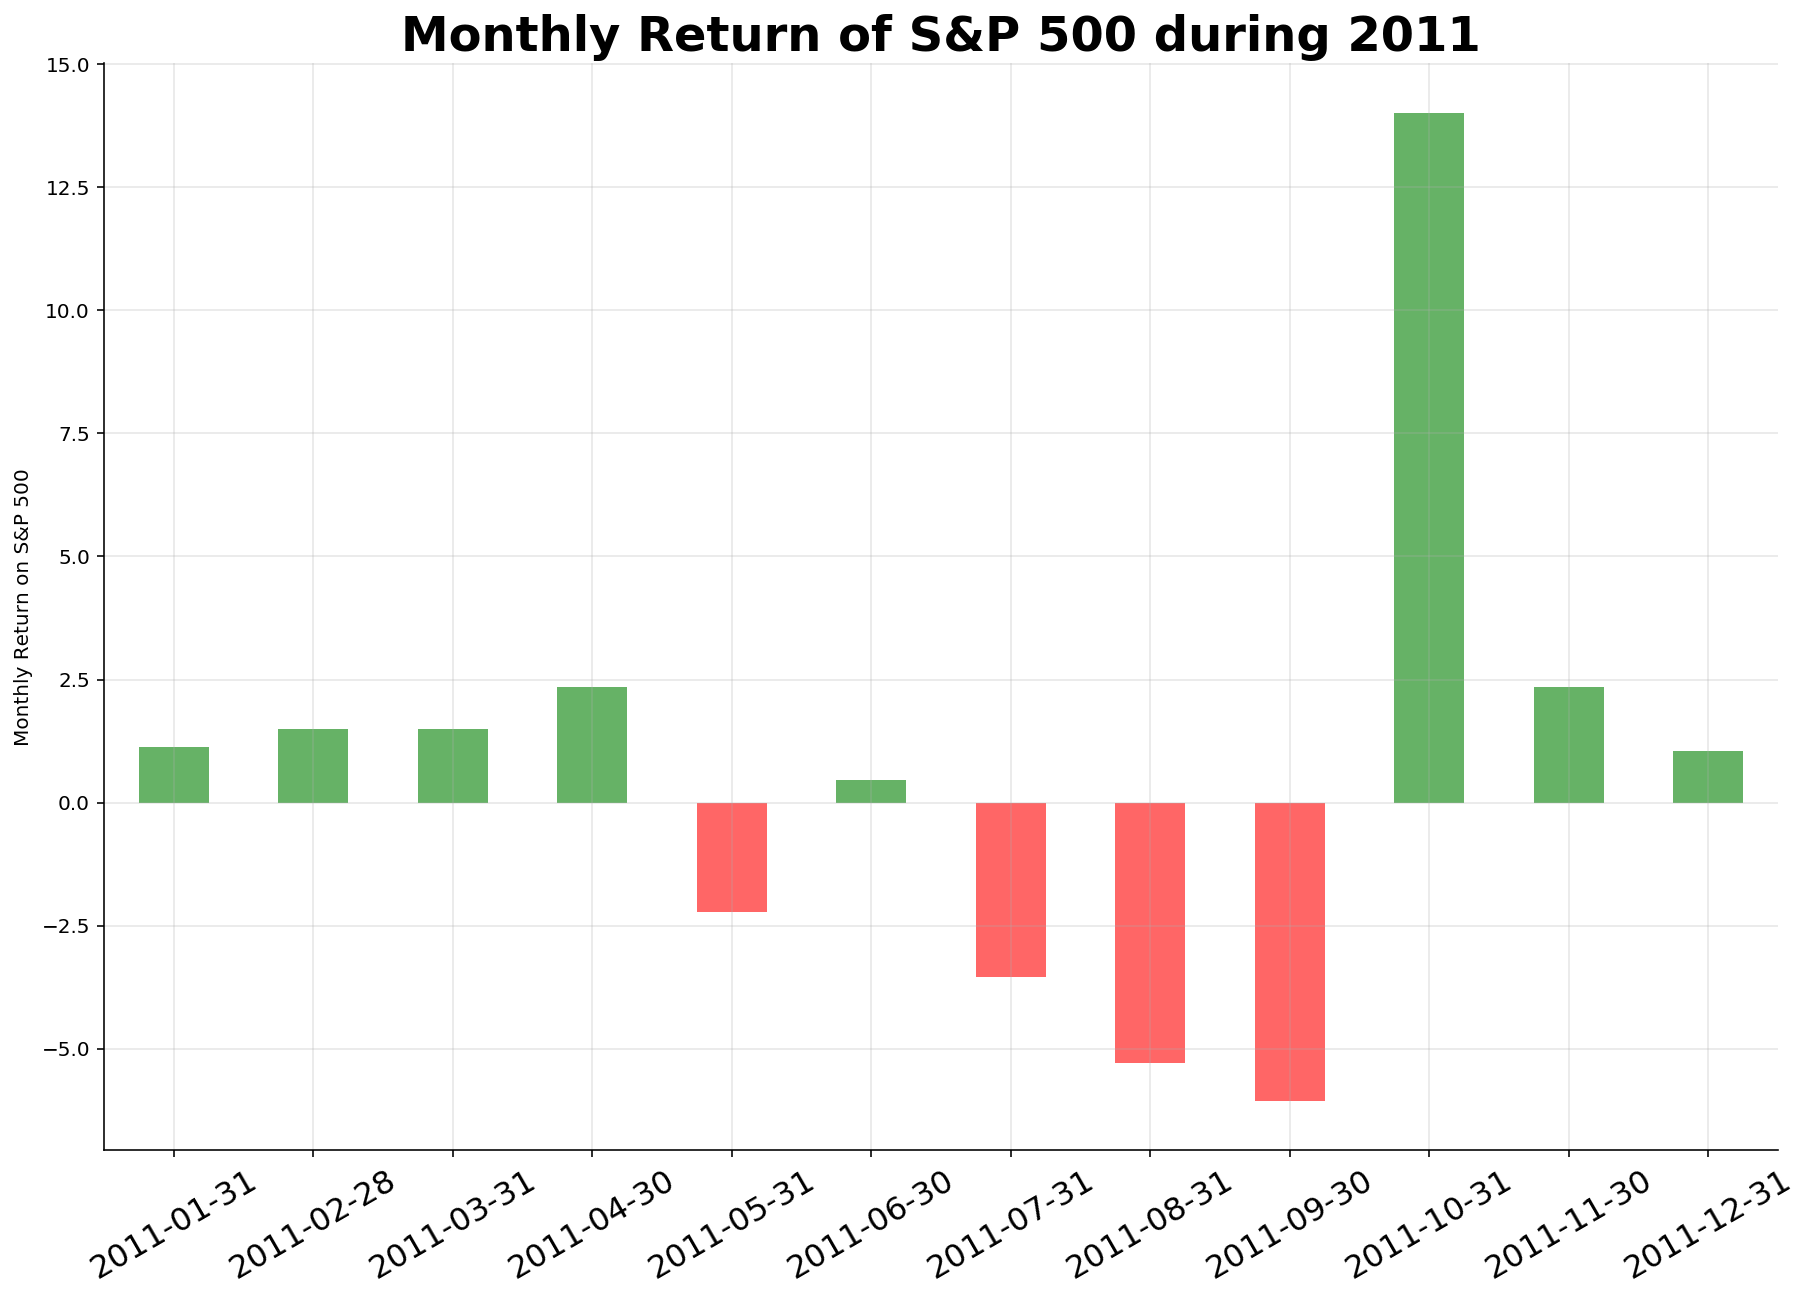

In [419]:
df = spx_m['2011']
colors = list(map(lambda x: 'green' if x > 0 else 'red', df.values))
ax = df.plot.bar(figsize = [15,10], color = colors, alpha = 0.6)
ax.set_xticklabels(labels = [ex.strftime('%Y-%m-%d') for ex in df.index], fontsize = 16)
plt.xticks(rotation = 30)
plt.ylabel('Monthly Return on S&P 500')
ax.grid(True, alpha = 0.3)
plt.title('Monthly Return of S&P 500 during 2011', fontweight='bold', fontsize = 24)
sns.despine()
plt.savefig('SP500_2011.png')

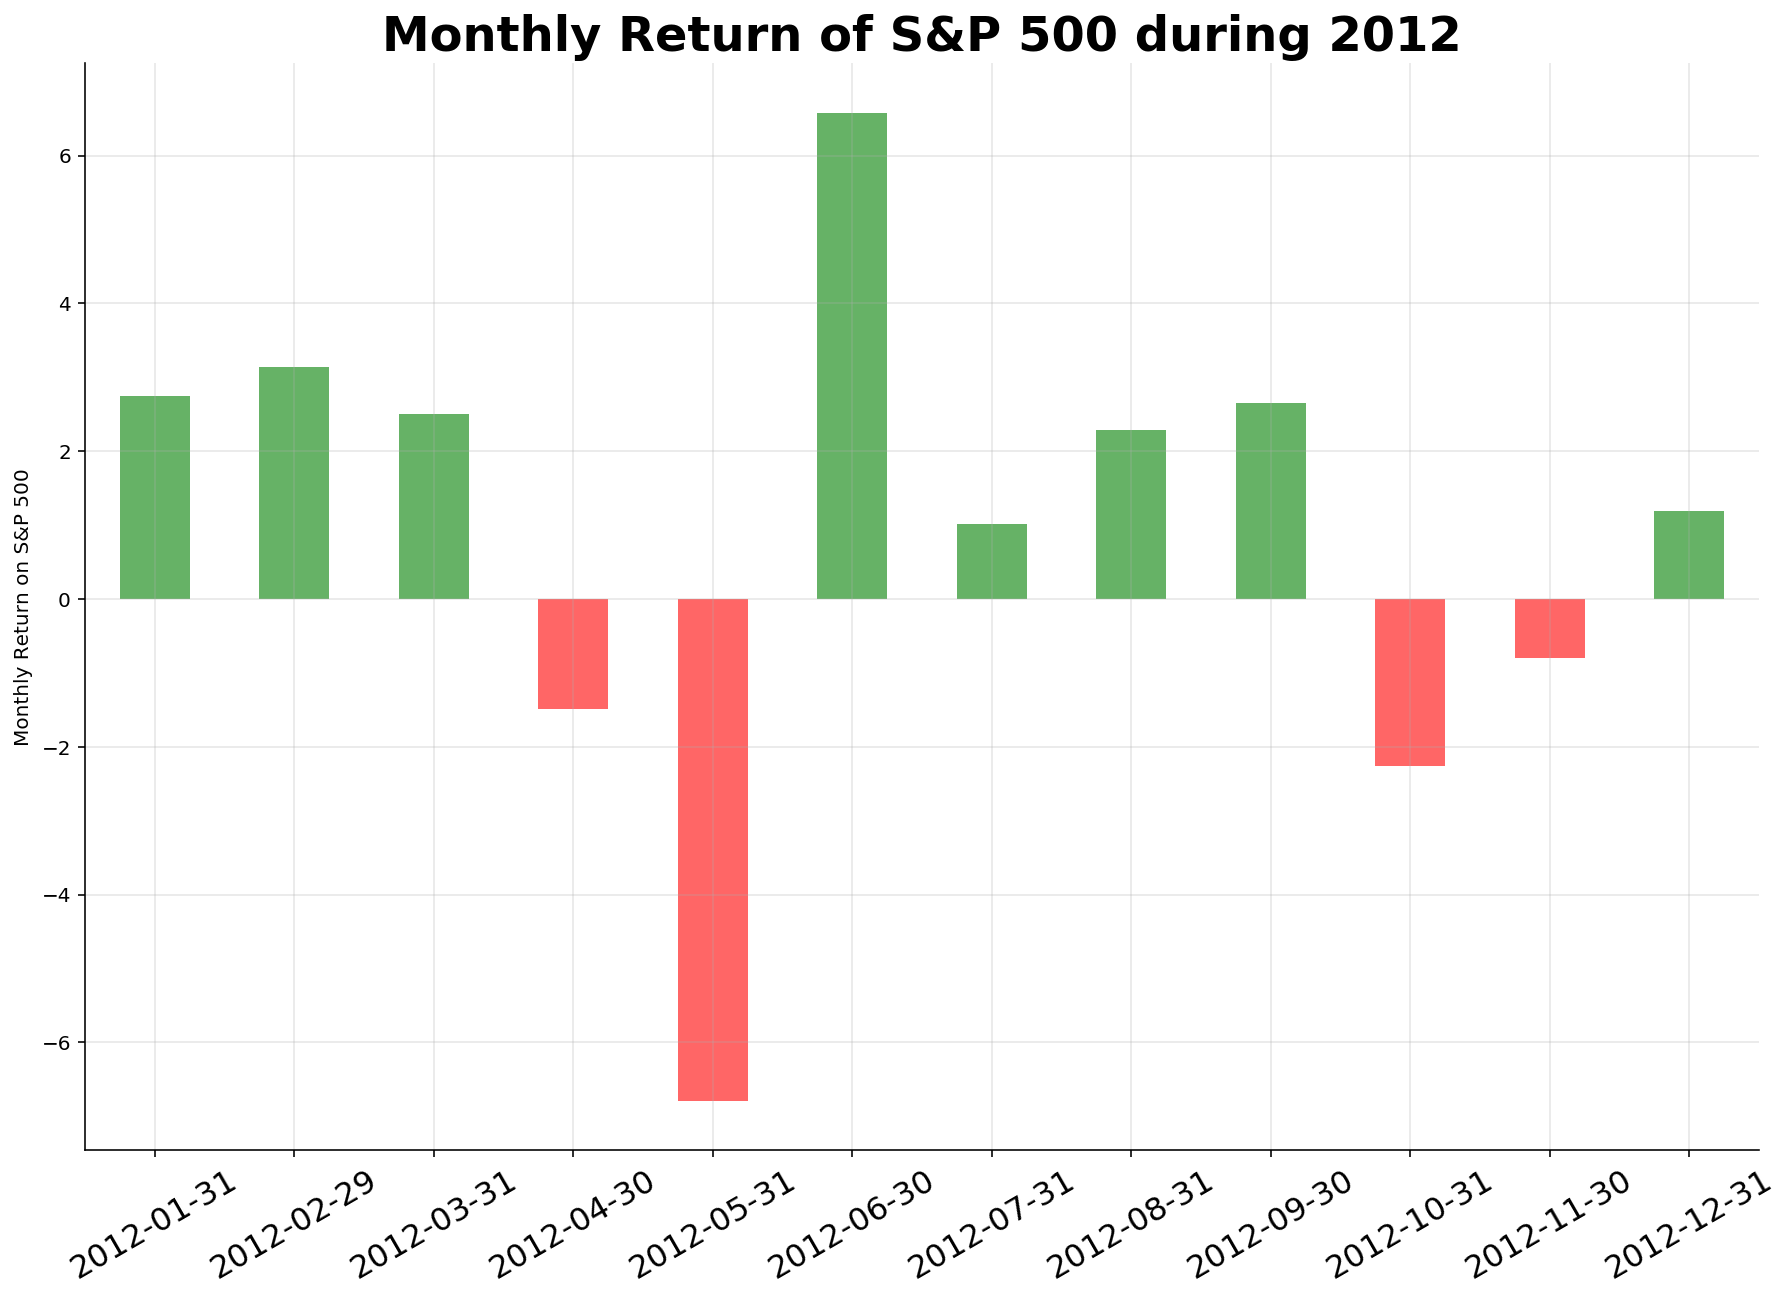

In [420]:
df = spx_m['2012']
colors = list(map(lambda x: 'green' if x > 0 else 'red', df.values))
ax = df.plot.bar(figsize = [15,10], color = colors, alpha = 0.6)
ax.set_xticklabels(labels = [ex.strftime('%Y-%m-%d') for ex in df.index], fontsize = 16)
plt.xticks(rotation = 30)
plt.ylabel('Monthly Return on S&P 500')
ax.grid(True, alpha = 0.3)
plt.title('Monthly Return of S&P 500 during 2012', fontweight='bold', fontsize = 24)
sns.despine()
plt.savefig('SP500_2012.png')